# IPP Analysis
edited from Giulia's workbook for IPP to include in EBPS talk, Sept 2019
kept in IPP1 Github on McCutcheon Lab

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib as mpl

import itertools
from itertools import chain
import pandas as pd

import numpy as np
#import dill

import JM_general_functions as jmf
import JM_custom_figs as jmfig

In [3]:
green = mpl.colors.to_rgb('xkcd:kelly green')
light_green = mpl.colors.to_rgb('xkcd:light green')
almost_black = mpl.colors.to_rgb('#262626')

col={}
col['np_cas'] = 'xkcd:silver'
col['np_malt'] = 'white'
col['lp_cas'] = green
col['lp_malt'] = light_green

In [4]:
# licks Test 1


medfolder='..\\data\\'
metafile=medfolder + 'metafileIPP2_3.txt'

def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(jmf.medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
LLicks_all = []
for l in Licks:
    LLicks.append(len(l[0]))
    LLicks_all.append(l[0])

RLicks = []
RLicks_all = []
for l in Licks:
    RLicks_all.append(l[1])
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []

hist1_C_NR = []
hist1_M_NR = []
hist1_C_PR = []
hist1_M_PR = []

bins = range(0,3600, 60)

for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                        hist1_C_NR.append(np.histogram(LLicks_all[index], bins=bins)[0])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                        hist1_C_NR.append(np.histogram(RLicks_all[index], bins=bins)[0])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                        hist1_M_NR.append(np.histogram(LLicks_all[index], bins=bins)[0])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                        hist1_M_NR.append(np.histogram(RLicks_all[index], bins=bins)[0])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                        hist1_C_PR.append(np.histogram(LLicks_all[index], bins=bins)[0])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                        hist1_C_PR.append(np.histogram(RLicks_all[index], bins=bins)[0])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                        hist1_M_PR.append(np.histogram(LLicks_all[index], bins=bins)[0])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        hist1_M_PR.append(np.histogram(RLicks_all[index], bins=bins)[0])


In [5]:
# calculate cumulative curves

def cumsum_calc(hists):
    
    cumsums = []
    for hist in hists:
        cumsums.append(np.cumsum(hist))
        
    mean = np.mean(cumsums, axis=0)
    sem = np.std(cumsums, axis=0)/np.sqrt(len(cumsums))
   
    return {'cumsum': cumsums, 'mean': mean, 'sem': sem}

cumsum_C_NR = cumsum_calc(hist1_C_NR)
cumsum_M_NR = cumsum_calc(hist1_M_NR)
cumsum_C_PR = cumsum_calc(hist1_C_PR)
cumsum_M_PR = cumsum_calc(hist1_M_PR)

''

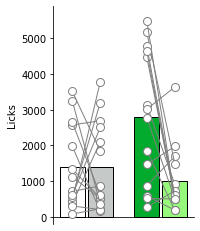

In [6]:
f, ax = plt.subplots(figsize=(3,4))
f.subplots_adjust(left=0.25)

jmfig.barscatter([[test1_C_NR, test1_M_NR], [test1_C_PR, test1_M_PR]],
                 paired=True, ax=ax,
                 barfacecoloroption='individual',
                 barfacecolor=['white', 'xkcd:silver', 'xkcd:kelly green', 'xkcd:light green'])

ax.set_ylim([-200, 5900])
ax.set_ylabel('Licks')
ax.set_xticks([])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)

# f.savefig('..\\figs\\IPP_bar.pdf', dpi=600)
;

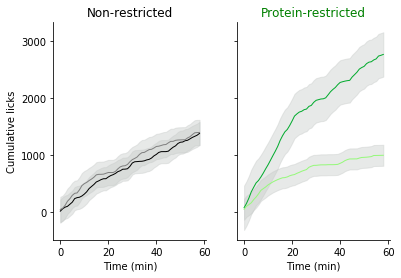

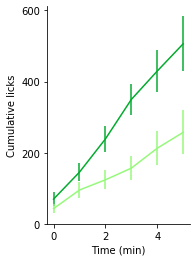

In [40]:
f2, ax = plt.subplots(figsize=(6,4), ncols=2, sharey=True)
f2.subplots_adjust(left=0.12)

jmfig.shadedError(ax[0], cumsum_C_NR['cumsum'],
                 linecolor='black', errorcolor = 'xkcd:silver', linewidth=1)
jmfig.shadedError(ax[0], cumsum_M_NR['cumsum'],
                 linecolor='grey', errorcolor = 'xkcd:silver', linewidth=1)

jmfig.shadedError(ax[1], cumsum_C_PR['cumsum'],
                 linecolor=green, errorcolor = 'xkcd:silver', linewidth=1)
jmfig.shadedError(ax[1], cumsum_M_PR['cumsum'],
                 linecolor=light_green, errorcolor = 'xkcd:silver', linewidth=1)



ax[0].set_ylabel('Cumulative licks')
ax[0].set_yticks([0, 1000, 2000, 3000])

ax[0].set_title('Non-restricted')
ax[1].set_title('Protein-restricted', color='g')

for axis in ax:
    axis.set_xlabel('Time (min)')
    for sp in ['right', 'top']:
        axis.spines[sp].set_visible(False)
        
f2.savefig('..\\figs\\IPP_hist.pdf', dpi=600)

f3, ax = plt.subplots(figsize=(3,4))
f3.subplots_adjust(left=0.24)

xvals = np.arange(0, 6)
ax.errorbar(xvals, cumsum_C_PR['mean'][:6], yerr=cumsum_C_PR['sem'][:6], color=green)
ax.errorbar(xvals, cumsum_M_PR['mean'][:6], yerr=cumsum_M_PR['sem'][:6], color=light_green)

ax.set_ylabel('Cumulative licks')
ax.set_yticks([0, 200, 400, 600])

ax.set_xlabel('Time (min)')
for sp in ['right', 'top']:
        ax.spines[sp].set_visible(False)
        
f3.savefig('..\\figs\\IPP_hist_red.pdf', dpi=600)

#ax.set_xlim([-1, 6])

In [8]:
def dividelicks(licks, time):
    before = [x for x in licks if x < time]
    after = [x for x in licks if x > time]
    
    return before, after



for i in rats:
    for j in ['s10']:
        
        x = rats[i].sessions[j]

        x.left['licks-forced'], x.left['licks-free'] = dividelicks(x.left['licks'], x.both['sipper'][0])
        x.right['licks-forced'], x.right['licks-free'] = dividelicks(x.right['licks'], x.both['sipper'][0])

df = pd.DataFrame([x for x in rats])

NameError: name 'rats' is not defined